## bibliotecas e funções

In [1]:
# Manipulação e Tratamento de dados
import openpyxl
import pandas as pd
import numpy as np
from numpy import NaN
import duckdb as dd

#ignorando Warning inuteis
import warnings 
from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

#definindo quantidade de linhas e colunas visiveis
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 500)

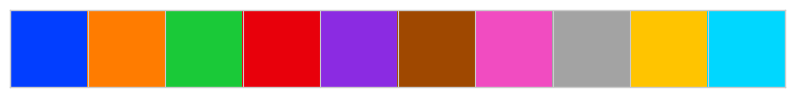

In [2]:
# Graficos ############################
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.dates as mdates

plt.style.use('dark_background')
plt.style.use('seaborn-v0_8-whitegrid')

import seaborn as sns
custom_palette = sns.color_palette("bright")
sns.palplot(custom_palette)
sns.set_palette("bright")
sns.set_style('whitegrid') #cor da grade(fundo)

# Definindo o estilo de fonte e tema
import matplotlib.font_manager as fm #para alterar as fontes dos graficos
fonte = fm.FontProperties(family="Calibri", style="italic")
%matplotlib inline

In [3]:
# Copia e cola
import pyperclip

# Manipulação de Strings
from unidecode import unidecode #unidecode(string)
import re # Regex

# Controle de Erros
import traceback

# Manipualação de datas
from datetime import *

In [4]:
# Carregando minhas funções de analise de dados e criação de modelos
import requests

url = "https://raw.githubusercontent.com/GabrielGabes/functions_gsa/main/" + 'funcoes_estatisticas' + ".py"
print(url); response = requests.get(url); code = response.text; exec(code)

# Função para avaliação de modelos exibindo metricas de avaliação
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, RocCurveDisplay
url = "https://raw.githubusercontent.com/GabrielGabes/functions_gsa/main/" + 'ML_supervised_learning' + ".py"
print(url); response = requests.get(url); code = response.text; exec(code)

def aval_modelo_corte_tabela(y_true, y_probs_positivas, beta = 1.5, pontos_de_corte = np.arange(10, 100, 10)):
    y_probs_positivas = np.array(y_probs_positivas)
    # Inicializando um DataFrame para armazenar as métricas
    fd = pd.DataFrame(columns=['threshold', 'tn', 'fp', 'fn', 'tp'])

    # Loop pelos pontos de corte
    for threshold in pontos_de_corte:
        previsoes_personalizadas = (y_probs_positivas >= threshold).astype(int)

        # Calculando os valores de tn, fp, fn, tp
        tn = len(np.where((previsoes_personalizadas == 0) & (y_true == 0))[0])
        fp = len(np.where((previsoes_personalizadas == 1) & (y_true == 0))[0])
        
        fn = len(np.where((previsoes_personalizadas == 0) & (y_true == 1))[0])
        tp = len(np.where((previsoes_personalizadas == 1) & (y_true == 1))[0])

        # Adicionando os resultados ao DataFrame 'fd'
        fd = pd.concat([fd, pd.DataFrame([[threshold, tn, fp, fn, tp]], columns=fd.columns)])

    # Substituir valores NaN por 0
    fd.fillna(0, inplace=True)
    fd.reset_index(drop=True, inplace=True)
    ######################################################################################

    # Inicializar as colunas das métricas com NaN
    metricas_de_aval = ['acuracia', 'precisao', 'sensibilidade', 'especificidade', 'f1', #'fb_score',
                        # 'valor_pre_posi', 'valor_pre_neg', 'taxa_falsos_positivos', 'taxa_falsos_negativos',
                        'custo_who','fraude_evitada','delta']#,
                        # 'fdr', 'fo_r', 'indice_youden', 'coef_matthews']
    fd[metricas_de_aval] = 0

    # Loop para calcular as métricas em cada linha
    for i in range(len(fd)):
        # Acurácia
        if (fd['tn'][i] + fd['fp'][i] + fd['fn'][i] + fd['tp'][i]) != 0:
            fd['acuracia'][i] = (fd['tp'][i] + fd['tn'][i]) / (fd['tn'][i] + fd['fp'][i] + fd['fn'][i] + fd['tp'][i])

        # Precisão
        if (fd['tp'][i] + fd['fp'][i]) != 0:
            fd['precisao'][i] = fd['tp'][i] / (fd['tp'][i] + fd['fp'][i])

        # Sensibilidade (Recall)
        if (fd['tp'][i] + fd['fn'][i]) != 0:
            fd['sensibilidade'][i] = fd['tp'][i] / (fd['tp'][i] + fd['fn'][i])

        # Especificidade
        if (fd['tn'][i] + fd['fp'][i]) != 0:
            fd['especificidade'][i] = fd['tn'][i] / (fd['tn'][i] + fd['fp'][i])

        # F1-Score
        if (fd['precisao'][i] + fd['sensibilidade'][i]) != 0:
            fd['f1'][i] = 2 * (fd['precisao'][i] * fd['sensibilidade'][i]) / (fd['precisao'][i] + fd['sensibilidade'][i])

        # # Valor Preditivo Positivo
        # if (fd['tp'][i] + fd['fp'][i]) != 0:
        #     fd['valor_pre_posi'][i] = fd['tp'][i] / (fd['tp'][i] + fd['fp'][i])

        # # Valor Preditivo Negativo
        # if (fd['tn'][i] + fd['fn'][i]) != 0:
        #     fd['valor_pre_neg'][i] = fd['tn'][i] / (fd['tn'][i] + fd['fn'][i])

        # # Taxa de Falsos Positivos
        # fd['taxa_falsos_positivos'][i] = 1 - fd['especificidade'][i]

        # # Taxa de Falsos Negativos
        # fd['taxa_falsos_negativos'][i] = 1 - fd['sensibilidade'][i]

        fd['custo_who'][i] = (fd['tp'][i] + fd['fp'][i]) * 10.0
        fd['fraude_evitada'][i] = fd['tp'][i] * 8000
        fd['delta'][i] = fd['fraude_evitada'][i] - fd['custo_who'][i]

        # # False Discovery Rate (FDR)
        # if (fd['tp'][i] + fd['fp'][i]) != 0:
        #     fd['fdr'][i] = fd['fp'][i] / (fd['tp'][i] + fd['fp'][i])

        # # False Omission Rate (FOR)
        # if (fd['tn'][i] + fd['fn'][i]) != 0:
        #     fd['fo_r'][i] = fd['fn'][i] / (fd['tn'][i] + fd['fn'][i])

        # # Índice de Youden
        # fd['indice_youden'][i] = fd['sensibilidade'][i] + fd['especificidade'][i] - 1

        # try:
        #     # Coeficiente de Matthews (MCC)
        #     denom_matthews = (fd['tp'][i]+fd['fp'][i])*(fd['tp'][i]+fd['fn'][i])*(fd['tn'][i]+fd['fp'][i])*(fd['tn'][i]+fd['fn'][i])
        #     if denom_matthews != 0:
        #         fd['coef_matthews'][i] = (fd['tp'][i]*fd['tn'][i] - fd['fp'][i]*fd['fn'][i]) / np.sqrt(denom_matthews)
        # except:
        #     fd['coef_matthews'][i] = np.nan

        # # F-beta Score
        # denom_fb_score = (beta**2 * fd['valor_pre_posi'][i]) + fd['sensibilidade'][i]
        # if denom_fb_score != 0:
        #     fd['fb_score'][i] = (1 + beta**2) * (fd['valor_pre_posi'][i] * fd['sensibilidade'][i]) / denom_fb_score

    fd[metricas_de_aval] = fd[metricas_de_aval].round(3)
    return fd

print('TUDO OK')

https://raw.githubusercontent.com/GabrielGabes/functions_gsa/main/funcoes_estatisticas.py
https://raw.githubusercontent.com/GabrielGabes/functions_gsa/main/ML_supervised_learning.py
TUDO OK


In [5]:
def tabela_cont(df, linha, coluna):
    a = df.groupby([linha, coluna]).size().unstack()
    for i in a.columns:
        a[i].fillna(0, inplace = True)
        a[i] = a[i].apply(lambda x: int(x))
    return a

def count_table_percent(df, linha, coluna, opcao):
    result = tabela_cont(df, linha, coluna)
    if opcao == 'Linha':
        return round(result.div(result.sum(axis=1), axis=0) * 100, 2)
    elif opcao == 'Coluna':
        return round(result.div(result.sum(), axis=1) * 100, 2)
    else:
        return 'Opção invalida'

In [6]:
# Função para plotar a importância das características de um modelo
def feature_importance_emsamble(modelo, x_columns):

    # Função para calcular a importância média das características no BaggingClassifier
    def feature_importance_bagging(modelo, x_columns):
        if hasattr(modelo, 'estimators_'):
            # Verificar se os estimadores possuem feature_importances_
            importancias = [tree.feature_importances_ for tree in modelo.estimators_ if hasattr(tree, 'feature_importances_')]
            if len(importancias) > 0:
                # Calcula a média das importâncias
                media_importancias = np.mean(importancias, axis=0)
                return pd.DataFrame({'colunas': x_columns, 'importancia': media_importancias})

    # Verificar se o modelo possui o atributo feature_importances_
    if hasattr(modelo, 'feature_importances_'):
        importancias = pd.DataFrame({'colunas': x_columns, 
                                     'importancia': modelo.feature_importances_})
    elif isinstance(modelo, BaggingClassifier):
        importancias = feature_importance_bagging(modelo, x_columns)
    else:
        print(f"O modelo não possui feature_importances_.")
        return

    importancias = importancias.sort_values(by='importancia', ascending=False)
    return importancias

def plot_importancias(tabela_feature_importance):
    plt.figure(figsize=(10, 12))
    sns.barplot(x='importancia', y='colunas', data=tabela_feature_importance, palette='viridis')
    # plt.title(f'Importância das Características - {nome_modelo}')
    plt.xlabel('Importância')
    plt.ylabel('Características')
    plt.show()

### carregando dataframe

In [7]:
# df = pd.read_csv('dados_consolidados.csv', sep=';')
df = pd.read_parquet('dados_consolidados_amostra.parquet')
df_bck = df.copy()
print(df.shape)
df.sample(3)

(35332, 86)


,CIDADE_CADASTRO,COD_BENEFICIO,COD_LOJA_ATIVACAO,COD_LOJA_OFICIAL,COD_SIGLA,COD_SOLICBENEFICIO,COD_STATUS,COMPARA_LOJA,COMPARA_LOJA_UF,COMPARA_NASC,DATA_BIOMETRIA,DES_DOCUMENTO,DES_DOCUMENTO_bin,DES_MEIOPAGAMENTO,DES_METODO,DIAS_ATIVACAO,DIAS_ATIVACAO2,DIAS_ATIVACAO2_bin,DIAS_ATIVACAO_bin,DIA_SEMANA,DIA_SEMANA_qtde_fraudes_6meses,DIF_DATA_MIN,DIF_DATA_MIN_bin,DTAHRA_INI_SOLICITACAO,DTA_CONTROLE,DTA_INI_SOLICITACAO,DTA_INI_SOLICITACAO_menos6meses,DTA_NASCIMENTO,DTA_NASCIMENTO_CADUNICO,DTA_NASCIMENTO_CAD_BENE,DTA_VALIDADE_CREDITO,DTH_INCLUSAO,IDADE,IDADE_CAT10_10,IDADE_CAT10_10_qtde_fraudes_6meses,INDEXX,NOME_LOJA_ATIVACAO,NOME_LOJA_OFICIAL,NOM_ESPECIEBENEFICIO,NOM_ESPECIEBENEFICIO2,NOM_ESPECIEBENEFICIO_qtde_fraudes_6meses,NOM_PAPELPESSOA,NUM_BENEFICIO,NUM_CPF,NUM_LOTEPREGAO,PRACA,QTDE_CPFS_COM_MESMO_TELEFONE,QTDE_TELEFONES_COMPARTILHADOS,SCORE_UNICO,SCORE_UNICO_CAT,SCORE_UNICO_CAT_qtde_fraudes_6meses,SEQ_ORGAOPAGADOR,SLG_SEXO,STATUS_WHO,TELEFONE_COMPARTILHADO,TIPO_BENEFICIO,TPO_DOCUMENTO,TPO_DOCUMENTO_bin,UF_CADASTRO,UF_CADASTRO_REGIAO,UF_CADASTRO_REGIAO_qtde_fraudes_6meses,UF_CADASTRO_qtde_fraudes_6meses,UF_LOJA_ATIVACAO,UF_LOJA_ATIVACAO_qtde_fraudes_6meses,UF_LOJA_OFICIAL,VLR_TOTALCREDITO,VLR_TOTALCREDITO_1000em1000,VLR_TOTALCREDITO_500em500,VLR_TOTALCREDITO_bin,Y,beneficio_de_risco,beneficios_que_tiveram_fraude,comparacao_cadastro_unico_e_bene,INI_SOLICITACAO_TRIMESTRE,SCORE_UNICO_CAT_com_fraude_periodo_passado_TRIMESTRE_qtde,SCORE_UNICO_CAT_com_fraude_periodo_passado_TRIMESTRE_bin,IDADE_CAT10_10_com_fraude_periodo_passado_TRIMESTRE_qtde,IDADE_CAT10_10_com_fraude_periodo_passado_TRIMESTRE_bin,DIA_SEMANA_com_fraude_periodo_passado_TRIMESTRE_qtde,DIA_SEMANA_com_fraude_periodo_passado_TRIMESTRE_bin,UF_CADASTRO_com_fraude_periodo_passado_TRIMESTRE_qtde,UF_CADASTRO_com_fraude_periodo_passado_TRIMESTRE_bin,UF_CADASTRO_REGIAO_com_fraude_periodo_passado_TRIMESTRE_qtde,UF_CADASTRO_REGIAO_com_fraude_periodo_passado_TRIMESTRE_bin,NOM_ESPECIEBENEFICIO_com_fraude_periodo_passado_TRIMESTRE_qtde,NOM_ESPECIEBENEFICIO_com_fraude_periodo_passado_TRIMESTRE_bin
10543,CAMETA,2496868,6106,6106,None,2752200,33,1,1,0,None,DOCUMENTO DE IDENTIFICACAO,1,CARTAO MAGNETICO,None,44.0,30.0,1,1,Thursday,14,-201.833333,0,14/12/2023 11:32:41,14/12/2023 11:44:32,2023-12-14,2023-06-14,1979-12-05,1979-12-05,1979-12-05,2023-11-14,2023-10-31,44.0,40–49,10,1187781,FILIAL CAMETA PA,FILIAL CAMETA PA,APOSENTADORIA POR INVALIDEZ PREVIDENCIARIO,APOSENTADORIA,1,TITULAR,6460833790,72128470200,22,PRACA ANTIGA,3.0,1.0,0.0,Sem Biometria,91,426,0,Não_Analisado,1,1,1,1,PA,Norte,11,5,PA,5,PA,9075.9,9000–9999,9000–9499,1,0,0,1,1,2023Q4,13,1,2,1,1,1,1,1,2,1,0,0
22819,BALDIM,3868937,4095,4095,RPA_INSS-L2P,4294579,33,1,1,0,2025-02-25,DOCUMENTO DE IDENTIFICACAO,1,CARTAO MAGNETICO,CreateProcessIdUnico,21.0,7.0,1,1,Tuesday,54,-198.533333,0,25/02/2025 11:35:28,24/03/2025 11:31:22,2025-02-25,2024-08-25,1961-07-20,1961-07-20,1961-07-20,2025-02-18,2025-02-04,63.0,60–69,39,1810621,FILIAL SETE LAGOAS MG,FILIAL SETE LAGOAS MG,AUXILIO DOENCA PREVIDENCIARIO (BENEFICIO TEMPO...,AUXILIO DOENCA PREVIDENCIARIO,64,TITULAR,7186939580,62793055620,12,PRACA NOVA,2.0,0.0,96.0,Aprovado ID,60,301,0,Não_Analisado,0,0,1,1,MG,Sudeste,79,4,MG,4,MG,3947.0,3000–3999,3500–3999,0,0,1,1,1,2025Q1,25,1,21,1,28,1,1,1,35,1,28,1
7578,JOAO PESSOA,3414662,6451,6451,RPA_INSS-L2P,3706388,33,1,1,0,2024-11-11,DOCUMENTO DE IDENTIFICACAO,1,CARTAO MAGNETICO,CreateProcessIdUnico,27.0,4.0,1,1,Monday,32,-201.950000,0,11/11/2024 11:05:03,17/03/2025 17:32:24,2024-11-11,2024-05-11,1958-02-28,1958-02-28,1958-02-28,2024-11-07,2024-10-15,66.0,60–69,56,966719,FILIAL SANTA RITA-PB,FILIAL SANTA RITA-PB,AMPARO SOCIAL AO IDOSO,LOES,33,TITULAR,7164874809,30891140468,23,PRACA NOVA,1.0,0.0,96.0,Aprovado ID,5,451,1,Não_Analisado,0,1,1,1,PB,Nordeste,90,6,PB,6,PB,8367.0,8000–8999,8000–8499,0,0,1,1,1,2024Q4,0,0,18,1,22,1,4,1,47,1,13,1


In [8]:
tipos_colunas = pd.DataFrame(df.dtypes).reset_index()
display(tipos_colunas)
# tipos_colunas.to_excel('tipo_colunas.xlsx', index=False)

,index,0
0,CIDADE_CADASTRO,object
1,COD_BENEFICIO,object
2,COD_LOJA_ATIVACAO,object
3,COD_LOJA_OFICIAL,object
4,COD_SIGLA,object
...,...,...
81,UF_CADASTRO_com_fraude_periodo_passado_TRIMEST...,int64
82,UF_CADASTRO_REGIAO_com_fraude_periodo_passado_...,int64
83,UF_CADASTRO_REGIAO_com_fraude_periodo_passado_...,int64
84,NOM_ESPECIEBENEFICIO_com_fraude_periodo_passad...,int64


# =========================================

In [9]:
# df = df_bck.copy()

# =========================================

### excluindo colunas não usadas no modelo

In [10]:
drop_colunas = [
'DTA_CONTROLE',

'DTA_INI_SOLICITACAO','INI_SOLICITACAO_TRIMESTRE','DTAHRA_INI_SOLICITACAO',
'DTA_INI_SOLICITACAO_menos6meses',

'DTH_INCLUSAO',

'DTA_NASCIMENTO',
'COD_BENEFICIO',
'COD_SOLICBENEFICIO',
'NUM_BENEFICIO',
'NUM_CPF',
'DTA_NASCIMENTO_CAD_BENE',

'SEQ_ORGAOPAGADOR',
'NUM_LOTEPREGAO',

'COD_STATUS',
'COMPARA_NASC',

'NOM_ESPECIEBENEFICIO',

'COD_LOJA_ATIVACAO',
'NOME_LOJA_ATIVACAO',

'COD_LOJA_OFICIAL',
'NOME_LOJA_OFICIAL',

'DTA_VALIDADE_CREDITO',

'CIDADE_CADASTRO',
'QTDE_CPFS_COM_MESMO_TELEFONE',
'QTDE_TELEFONES_COMPARTILHADOS',

'DATA_BIOMETRIA',
'DES_METODO',
'COD_SIGLA',
'DTA_NASCIMENTO_CADUNICO',

'DES_DOCUMENTO', 'DES_DOCUMENTO_bin',
'TPO_DOCUMENTO', 'TPO_DOCUMENTO_bin',
'DES_MEIOPAGAMENTO',

'STATUS_WHO',
]
df_colunas_excluidas = df[drop_colunas].copy()
df_colunas_excluidas['INDEXX'] = df['INDEXX']
df = df.drop(drop_colunas, axis=1)

sorted(df.columns)

['COMPARA_LOJA',
 'COMPARA_LOJA_UF',
 'DIAS_ATIVACAO',
 'DIAS_ATIVACAO2',
 'DIAS_ATIVACAO2_bin',
 'DIAS_ATIVACAO_bin',
 'DIA_SEMANA',
 'DIA_SEMANA_com_fraude_periodo_passado_TRIMESTRE_bin',
 'DIA_SEMANA_com_fraude_periodo_passado_TRIMESTRE_qtde',
 'DIA_SEMANA_qtde_fraudes_6meses',
 'DIF_DATA_MIN',
 'DIF_DATA_MIN_bin',
 'IDADE',
 'IDADE_CAT10_10',
 'IDADE_CAT10_10_com_fraude_periodo_passado_TRIMESTRE_bin',
 'IDADE_CAT10_10_com_fraude_periodo_passado_TRIMESTRE_qtde',
 'IDADE_CAT10_10_qtde_fraudes_6meses',
 'INDEXX',
 'NOM_ESPECIEBENEFICIO2',
 'NOM_ESPECIEBENEFICIO_com_fraude_periodo_passado_TRIMESTRE_bin',
 'NOM_ESPECIEBENEFICIO_com_fraude_periodo_passado_TRIMESTRE_qtde',
 'NOM_ESPECIEBENEFICIO_qtde_fraudes_6meses',
 'NOM_PAPELPESSOA',
 'PRACA',
 'SCORE_UNICO',
 'SCORE_UNICO_CAT',
 'SCORE_UNICO_CAT_com_fraude_periodo_passado_TRIMESTRE_bin',
 'SCORE_UNICO_CAT_com_fraude_periodo_passado_TRIMESTRE_qtde',
 'SCORE_UNICO_CAT_qtde_fraudes_6meses',
 'SLG_SEXO',
 'TELEFONE_COMPARTILHADO',
 'TIPO_

In [11]:
display(df[df['Y'] == 1].isnull().sum().sort_values(ascending=False).reset_index().head(10))

,index,0
0,COMPARA_LOJA,0
1,comparacao_cadastro_unico_e_bene,0
2,UF_LOJA_ATIVACAO,0
3,UF_LOJA_ATIVACAO_qtde_fraudes_6meses,0
4,UF_LOJA_OFICIAL,0
5,VLR_TOTALCREDITO,0
6,VLR_TOTALCREDITO_1000em1000,0
7,VLR_TOTALCREDITO_500em500,0
8,VLR_TOTALCREDITO_bin,0
9,Y,0


In [12]:
display(df.isnull().sum().sort_values(ascending=False).reset_index().head(15))
print(df.shape)
print(df['Y'].value_counts())

df = df.dropna()
print(df.shape)
print(df['Y'].value_counts())

df_colunas_excluidas = df_colunas_excluidas.loc[df.index]

,index,0
0,UF_CADASTRO_REGIAO,7
1,UF_CADASTRO,7
2,UF_LOJA_ATIVACAO,3
3,DIAS_ATIVACAO2,1
4,PRACA,1
5,UF_LOJA_OFICIAL,1
6,VLR_TOTALCREDITO,1
7,VLR_TOTALCREDITO_1000em1000,1
8,DIAS_ATIVACAO,1
9,VLR_TOTALCREDITO_500em500,1


(35332, 51)
Y
0    35322
1       10
Name: count, dtype: int64
(35321, 51)
Y
0    35311
1       10
Name: count, dtype: int64


In [13]:
df_bck_sem_colunas_e_linhas_inuteis = df.copy()

# Tratando dados

In [14]:
# from sklearn.preprocessing import LabelEncoder
# # Variavel Dependente
# y = df[['Y','INDEXX']] # Processar a variável dependente (Y)
# y = y.set_index('INDEXX', drop=False)
# # y = LabelEncoder().fit_transform(y)

# df = df.drop('Y', axis=1)
# y

In [15]:
# from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
OneHotEncoder(handle_unknown='ignore', sparse_output=True)

from pandas.api.types import is_numeric_dtype, is_object_dtype, is_bool_dtype


def tratando_dados(x):

    # Separar variável dependente antes de qualquer transformação
    # y = x['Y']
    # x = x.drop('Y', axis=1)

    # 1. Detectar colunas categóricas automaticamente
    colunas_categoricas = x.select_dtypes(include=['object', 'category']).columns.tolist()
    # 2. Filtrar apenas as colunas categóricas com mais de 2 categorias (não binárias)
    colunas_categoricas_nao_binarias = [col for col in colunas_categoricas if x[col].nunique(dropna=False) > 2]

    # 2. Criar transformador
    one_hot = make_column_transformer(
        (OneHotEncoder(drop='if_binary', sparse_output=False), colunas_categoricas_nao_binarias),
        remainder='passthrough'  # mantém as colunas numéricas
    )

    # 3. Aplicar transformação
    x_transformado = one_hot.fit_transform(x)

    # 4. Recuperar os nomes das novas colunas
    nomes_colunas = one_hot.get_feature_names_out()

    # 5. Transformar em DataFrame
    x = pd.DataFrame(x_transformado, columns=nomes_colunas)
    nomes_colunas_limpos = [nome.split('__')[-1] for nome in nomes_colunas]
    x.columns = nomes_colunas_limpos
    # x['Y'] = y

    # 6. Resetar o índice (opcional, se o índice anterior foi perdido)
    # x.reset_index(drop=True, inplace=True)

    # 7. Listar os nomes das colunas finais
    x_columns = x.columns.tolist()

    return x

### separando as variaveis categoricas com varias categorias para tratar com onehot

In [16]:
# 1. Detectar colunas categóricas automaticamente
colunas_categoricas = df.select_dtypes(include=['object', 'category']).columns.tolist()
# 2. Filtrar apenas as colunas categóricas com mais de 2 categorias (não binárias)
colunas_categoricas_nao_binarias = [col for col in colunas_categoricas if df[col].nunique(dropna=False) > 2]

# print(colunas_categoricas_nao_binarias0)
print(colunas_categoricas_nao_binarias)

['DIA_SEMANA', 'IDADE_CAT10_10', 'NOM_ESPECIEBENEFICIO2', 'NOM_PAPELPESSOA', 'PRACA', 'SCORE_UNICO_CAT', 'UF_CADASTRO', 'UF_CADASTRO_REGIAO', 'UF_LOJA_ATIVACAO', 'UF_LOJA_OFICIAL', 'VLR_TOTALCREDITO_1000em1000', 'VLR_TOTALCREDITO_500em500']


In [17]:
df_cat_tratados = tratando_dados(df[colunas_categoricas_nao_binarias])
print(sorted(df_cat_tratados.columns))
display(df_cat_tratados.head(3))

df_bin_num = df[[col for col in df.columns if col not in colunas_categoricas_nao_binarias]]
print(sorted(df_bin_num.columns))
display(df_bin_num.head(3))

['DIA_SEMANA_Friday', 'DIA_SEMANA_Monday', 'DIA_SEMANA_Saturday', 'DIA_SEMANA_Thursday', 'DIA_SEMANA_Tuesday', 'DIA_SEMANA_Wednesday', 'IDADE_CAT10_10_0–9', 'IDADE_CAT10_10_10–19', 'IDADE_CAT10_10_20–29', 'IDADE_CAT10_10_30–39', 'IDADE_CAT10_10_40–49', 'IDADE_CAT10_10_50–59', 'IDADE_CAT10_10_60–69', 'IDADE_CAT10_10_70–79', 'IDADE_CAT10_10_80–89', 'IDADE_CAT10_10_90–99', 'NOM_ESPECIEBENEFICIO2_ACIDENTE_TRABALHO', 'NOM_ESPECIEBENEFICIO2_APOSENTADORIA', 'NOM_ESPECIEBENEFICIO2_AUXILIO DOENCA PREVIDENCIARIO', 'NOM_ESPECIEBENEFICIO2_AUXILIO RECLUSAO', 'NOM_ESPECIEBENEFICIO2_DEFICIENCIA', 'NOM_ESPECIEBENEFICIO2_LOES', 'NOM_ESPECIEBENEFICIO2_MATERNIDADE', 'NOM_ESPECIEBENEFICIO2_OUTROS', 'NOM_ESPECIEBENEFICIO2_PENSAO', 'NOM_ESPECIEBENEFICIO2_TRABALHO', 'NOM_ESPECIEBENEFICIO2_UNIAO', 'NOM_PAPELPESSOA_REPRESENTANTE LEGAL', 'NOM_PAPELPESSOA_TERCEIRO', 'NOM_PAPELPESSOA_TITULAR', 'PRACA_PRACA ANTIGA', 'PRACA_PRACA NOVA', 'PRACA_PRACA_NAO_LISTADA', 'SCORE_UNICO_CAT_Aprovado 1:1', 'SCORE_UNICO_CAT_Apr

,DIA_SEMANA_Friday,DIA_SEMANA_Monday,DIA_SEMANA_Saturday,DIA_SEMANA_Thursday,DIA_SEMANA_Tuesday,DIA_SEMANA_Wednesday,IDADE_CAT10_10_0–9,IDADE_CAT10_10_10–19,IDADE_CAT10_10_20–29,IDADE_CAT10_10_30–39,IDADE_CAT10_10_40–49,IDADE_CAT10_10_50–59,IDADE_CAT10_10_60–69,IDADE_CAT10_10_70–79,IDADE_CAT10_10_80–89,IDADE_CAT10_10_90–99,NOM_ESPECIEBENEFICIO2_ACIDENTE_TRABALHO,NOM_ESPECIEBENEFICIO2_APOSENTADORIA,NOM_ESPECIEBENEFICIO2_AUXILIO DOENCA PREVIDENCIARIO,NOM_ESPECIEBENEFICIO2_AUXILIO RECLUSAO,NOM_ESPECIEBENEFICIO2_DEFICIENCIA,NOM_ESPECIEBENEFICIO2_LOES,NOM_ESPECIEBENEFICIO2_MATERNIDADE,NOM_ESPECIEBENEFICIO2_OUTROS,NOM_ESPECIEBENEFICIO2_PENSAO,NOM_ESPECIEBENEFICIO2_TRABALHO,NOM_ESPECIEBENEFICIO2_UNIAO,NOM_PAPELPESSOA_REPRESENTANTE LEGAL,NOM_PAPELPESSOA_TERCEIRO,NOM_PAPELPESSOA_TITULAR,PRACA_PRACA ANTIGA,PRACA_PRACA NOVA,PRACA_PRACA_NAO_LISTADA,SCORE_UNICO_CAT_Aprovado 1:1,SCORE_UNICO_CAT_Aprovado ID,SCORE_UNICO_CAT_Aprovado Unico Check,SCORE_UNICO_CAT_Aprovado e Confiavel Unico Check,SCORE_UNICO_CAT_Erro - N Validado,SCORE_UNICO_CAT_Face Nova e Desconhecida,SCORE_UNICO_CAT_Reprovado 1:1,SCORE_UNICO_CAT_Reprovado Unico Check,SCORE_UNICO_CAT_Sem Biometria,UF_CADASTRO_AC,UF_CADASTRO_AL,UF_CADASTRO_AM,UF_CADASTRO_AP,UF_CADASTRO_BA,UF_CADASTRO_CE,UF_CADASTRO_DF,UF_CADASTRO_ES,UF_CADASTRO_GO,UF_CADASTRO_MA,UF_CADASTRO_MG,UF_CADASTRO_MS,UF_CADASTRO_MT,UF_CADASTRO_PA,UF_CADASTRO_PB,UF_CADASTRO_PE,UF_CADASTRO_PI,UF_CADASTRO_PR,UF_CADASTRO_RJ,UF_CADASTRO_RN,UF_CADASTRO_RO,UF_CADASTRO_RR,UF_CADASTRO_RS,UF_CADASTRO_SC,UF_CADASTRO_SE,UF_CADASTRO_SP,UF_CADASTRO_TO,UF_CADASTRO_REGIAO_Centro-Oeste,UF_CADASTRO_REGIAO_Nordeste,UF_CADASTRO_REGIAO_Norte,UF_CADASTRO_REGIAO_Sudeste,UF_CADASTRO_REGIAO_Sul,UF_LOJA_ATIVACAO_AC,UF_LOJA_ATIVACAO_AL,UF_LOJA_ATIVACAO_AM,UF_LOJA_ATIVACAO_AP,UF_LOJA_ATIVACAO_BA,UF_LOJA_ATIVACAO_CE,UF_LOJA_ATIVACAO_DF,UF_LOJA_ATIVACAO_ES,UF_LOJA_ATIVACAO_GO,UF_LOJA_ATIVACAO_MA,UF_LOJA_ATIVACAO_MG,UF_LOJA_ATIVACAO_MS,UF_LOJA_ATIVACAO_MT,UF_LOJA_ATIVACAO_PA,UF_LOJA_ATIVACAO_PB,UF_LOJA_ATIVACAO_PE,UF_LOJA_ATIVACAO_PI,UF_LOJA_ATIVACAO_PR,UF_LOJA_ATIVACAO_RJ,UF_LOJA_ATIVACAO_RN,UF_LOJA_ATIVACAO_RO,UF_LOJA_ATIVACAO_RR,UF_LOJA_ATIVACAO_RS,UF_LOJA_ATIVACAO_SC,UF_LOJA_ATIVACAO_SE,UF_LOJA_ATIVACAO_SP,UF_LOJA_ATIVACAO_TO,UF_LOJA_OFICIAL_AC,UF_LOJA_OFICIAL_AL,UF_LOJA_OFICIAL_AM,UF_LOJA_OFICIAL_AP,UF_LOJA_OFICIAL_BA,UF_LOJA_OFICIAL_CE,UF_LOJA_OFICIAL_DF,UF_LOJA_OFICIAL_ES,UF_LOJA_OFICIAL_GO,UF_LOJA_OFICIAL_MA,UF_LOJA_OFICIAL_MG,UF_LOJA_OFICIAL_MS,UF_LOJA_OFICIAL_MT,UF_LOJA_OFICIAL_PA,UF_LOJA_OFICIAL_PB,UF_LOJA_OFICIAL_PE,UF_LOJA_OFICIAL_PI,UF_LOJA_OFICIAL_PR,UF_LOJA_OFICIAL_RJ,UF_LOJA_OFICIAL_RN,UF_LOJA_OFICIAL_RO,UF_LOJA_OFICIAL_RR,UF_LOJA_OFICIAL_RS,UF_LOJA_OFICIAL_SC,UF_LOJA_OFICIAL_SE,UF_LOJA_OFICIAL_SP,UF_LOJA_OFICIAL_TO,VLR_TOTALCREDITO_1000em1000_0–999,VLR_TOTALCREDITO_1000em1000_10000–10999,VLR_TOTALCREDITO_1000em1000_1000–1999,VLR_TOTALCREDITO_1000em1000_11000–11999,VLR_TOTALCREDITO_1000em1000_12000–12999,VLR_TOTALCREDITO_1000em1000_13000–13999,VLR_TOTALCREDITO_1000em1000_15000+,VLR_TOTALCREDITO_1000em1000_2000–2999,VLR_TOTALCREDITO_1000em1000_3000–3999,VLR_TOTALCREDITO_1000em1000_4000–4999,VLR_TOTALCREDITO_1000em1000_5000–5999,VLR_TOTALCREDITO_1000em1000_6000–6999,VLR_TOTALCREDITO_1000em1000_7000–7999,VLR_TOTALCREDITO_1000em1000_8000–8999,VLR_TOTALCREDITO_1000em1000_9000–9999,VLR_TOTALCREDITO_500em500_0–499,VLR_TOTALCREDITO_500em500_10000–10499,VLR_TOTALCREDITO_500em500_1000–1499,VLR_TOTALCREDITO_500em500_10500–10999,VLR_TOTALCREDITO_500em500_11000–11499,VLR_TOTALCREDITO_500em500_11500–11999,VLR_TOTALCREDITO_500em500_12000–12499,VLR_TOTALCREDITO_500em500_12500–12999,VLR_TOTALCREDITO_500em500_13000–13499,VLR_TOTALCREDITO_500em500_13500–13999,VLR_TOTALCREDITO_500em500_14000–14499,VLR_TOTALCREDITO_500em500_15000+,VLR_TOTALCREDITO_500em500_1500–1999,VLR_TOTALCREDITO_500em500_2000–2499,VLR_TOTALCREDITO_500em500_2500–2999,VLR_TOTALCREDITO_500em500_3000–3499,VLR_TOTALCREDITO_500em500_3500–3999,VLR_TOTALCREDITO_500em500_4000–4499,VLR_TOTALCRE

['COMPARA_LOJA', 'COMPARA_LOJA_UF', 'DIAS_ATIVACAO', 'DIAS_ATIVACAO2', 'DIAS_ATIVACAO2_bin', 'DIAS_ATIVACAO_bin', 'DIA_SEMANA_com_fraude_periodo_passado_TRIMESTRE_bin', 'DIA_SEMANA_com_fraude_periodo_passado_TRIMESTRE_qtde', 'DIA_SEMANA_qtde_fraudes_6meses', 'DIF_DATA_MIN', 'DIF_DATA_MIN_bin', 'IDADE', 'IDADE_CAT10_10_com_fraude_periodo_passado_TRIMESTRE_bin', 'IDADE_CAT10_10_com_fraude_periodo_passado_TRIMESTRE_qtde', 'IDADE_CAT10_10_qtde_fraudes_6meses', 'INDEXX', 'NOM_ESPECIEBENEFICIO_com_fraude_periodo_passado_TRIMESTRE_bin', 'NOM_ESPECIEBENEFICIO_com_fraude_periodo_passado_TRIMESTRE_qtde', 'NOM_ESPECIEBENEFICIO_qtde_fraudes_6meses', 'SCORE_UNICO', 'SCORE_UNICO_CAT_com_fraude_periodo_passado_TRIMESTRE_bin', 'SCORE_UNICO_CAT_com_fraude_periodo_passado_TRIMESTRE_qtde', 'SCORE_UNICO_CAT_qtde_fraudes_6meses', 'SLG_SEXO', 'TELEFONE_COMPARTILHADO', 'TIPO_BENEFICIO', 'UF_CADASTRO_REGIAO_com_fraude_periodo_passado_TRIMESTRE_bin', 'UF_CADASTRO_REGIAO_com_fraude_periodo_passado_TRIMESTRE_qtd

,COMPARA_LOJA,COMPARA_LOJA_UF,DIAS_ATIVACAO,DIAS_ATIVACAO2,DIAS_ATIVACAO2_bin,DIAS_ATIVACAO_bin,DIA_SEMANA_qtde_fraudes_6meses,DIF_DATA_MIN,DIF_DATA_MIN_bin,IDADE,IDADE_CAT10_10_qtde_fraudes_6meses,INDEXX,NOM_ESPECIEBENEFICIO_qtde_fraudes_6meses,SCORE_UNICO,SCORE_UNICO_CAT_qtde_fraudes_6meses,SLG_SEXO,TELEFONE_COMPARTILHADO,TIPO_BENEFICIO,UF_CADASTRO_REGIAO_qtde_fraudes_6meses,UF_CADASTRO_qtde_fraudes_6meses,UF_LOJA_ATIVACAO_qtde_fraudes_6meses,VLR_TOTALCREDITO,VLR_TOTALCREDITO_bin,Y,beneficio_de_risco,beneficios_que_tiveram_fraude,comparacao_cadastro_unico_e_bene,SCORE_UNICO_CAT_com_fraude_periodo_passado_TRIMESTRE_qtde,SCORE_UNICO_CAT_com_fraude_periodo_passado_TRIMESTRE_bin,IDADE_CAT10_10_com_fraude_periodo_passado_TRIMESTRE_qtde,IDADE_CAT10_10_com_fraude_periodo_passado_TRIMESTRE_bin,DIA_SEMANA_com_fraude_periodo_passado_TRIMESTRE_qtde,DIA_SEMANA_com_fraude_periodo_passado_TRIMESTRE_bin,UF_CADASTRO_com_fraude_periodo_passado_TRIMESTRE_qtde,UF_CADASTRO_com_fraude_periodo_passado_TRIMESTRE_bin,UF_CADASTRO_REGIAO_com_fraude_periodo_passado_TRIMESTRE_qtde,UF_CADASTRO_REGIAO_com_fraude_periodo_passado_TRIMESTRE_bin,NOM_ESPECIEBENEFICIO_com_fraude_periodo_passado_TRIMESTRE_qtde,NOM_ESPECIEBENEFICIO_com_fraude_periodo_passado_TRIMESTRE_bin
0,1,1,7.0,-7.0,0,0,63,-207.583333,0,32.0,23,1718056,65,95.0,87,0,0,0,67,6,6,9211.52,1,0,1,1,1,45,1,8,1,33,1,1,1,39,1,34,1
1,1,1,15.0,1.0,0,1,28,-193.066667,1,61.0,37,996701,23,10.0,13,1,1,1,48,9,9,7371.00,0,0,1,1,1,8,1,21,1,13,1,4,1,30,1,17,1
2,1,1,11.0,-1.0,0,0,28,-220.733333,0,63.0,37,1318550,23,0.0,15,1,0,1,75,32,32,2126.00,0,0,1,1,1,10,1,21,1,14,1,13,1,35,1,17,1


In [18]:
colunas = df_bin_num.columns.to_list() + df_cat_tratados.columns.to_list()
df = pd.DataFrame(np.concatenate((df_bin_num.to_numpy(), df_cat_tratados.to_numpy()), 1), columns=colunas)
df = df[sorted(df.columns)]
df['INDEXX'] = df['INDEXX'].astype('int64')
df = df.set_index('INDEXX', drop=False)
df.sample(3)

,COMPARA_LOJA,COMPARA_LOJA_UF,DIAS_ATIVACAO,DIAS_ATIVACAO2,DIAS_ATIVACAO2_bin,DIAS_ATIVACAO_bin,DIA_SEMANA_Friday,DIA_SEMANA_Monday,DIA_SEMANA_Saturday,DIA_SEMANA_Thursday,DIA_SEMANA_Tuesday,DIA_SEMANA_Wednesday,DIA_SEMANA_com_fraude_periodo_passado_TRIMESTRE_bin,DIA_SEMANA_com_fraude_periodo_passado_TRIMESTRE_qtde,DIA_SEMANA_qtde_fraudes_6meses,DIF_DATA_MIN,DIF_DATA_MIN_bin,IDADE,IDADE_CAT10_10_0–9,IDADE_CAT10_10_10–19,IDADE_CAT10_10_20–29,IDADE_CAT10_10_30–39,IDADE_CAT10_10_40–49,IDADE_CAT10_10_50–59,IDADE_CAT10_10_60–69,IDADE_CAT10_10_70–79,IDADE_CAT10_10_80–89,IDADE_CAT10_10_90–99,IDADE_CAT10_10_com_fraude_periodo_passado_TRIMESTRE_bin,IDADE_CAT10_10_com_fraude_periodo_passado_TRIMESTRE_qtde,IDADE_CAT10_10_qtde_fraudes_6meses,INDEXX,NOM_ESPECIEBENEFICIO2_ACIDENTE_TRABALHO,NOM_ESPECIEBENEFICIO2_APOSENTADORIA,NOM_ESPECIEBENEFICIO2_AUXILIO DOENCA PREVIDENCIARIO,NOM_ESPECIEBENEFICIO2_AUXILIO RECLUSAO,NOM_ESPECIEBENEFICIO2_DEFICIENCIA,NOM_ESPECIEBENEFICIO2_LOES,NOM_ESPECIEBENEFICIO2_MATERNIDADE,NOM_ESPECIEBENEFICIO2_OUTROS,NOM_ESPECIEBENEFICIO2_PENSAO,NOM_ESPECIEBENEFICIO2_TRABALHO,NOM_ESPECIEBENEFICIO2_UNIAO,NOM_ESPECIEBENEFICIO_com_fraude_periodo_passado_TRIMESTRE_bin,NOM_ESPECIEBENEFICIO_com_fraude_periodo_passado_TRIMESTRE_qtde,NOM_ESPECIEBENEFICIO_qtde_fraudes_6meses,NOM_PAPELPESSOA_REPRESENTANTE LEGAL,NOM_PAPELPESSOA_TERCEIRO,NOM_PAPELPESSOA_TITULAR,PRACA_PRACA ANTIGA,PRACA_PRACA NOVA,PRACA_PRACA_NAO_LISTADA,SCORE_UNICO,SCORE_UNICO_CAT_Aprovado 1:1,SCORE_UNICO_CAT_Aprovado ID,SCORE_UNICO_CAT_Aprovado Unico Check,SCORE_UNICO_CAT_Aprovado e Confiavel Unico Check,SCORE_UNICO_CAT_Erro - N Validado,SCORE_UNICO_CAT_Face Nova e Desconhecida,SCORE_UNICO_CAT_Reprovado 1:1,SCORE_UNICO_CAT_Reprovado Unico Check,SCORE_UNICO_CAT_Sem Biometria,SCORE_UNICO_CAT_com_fraude_periodo_passado_TRIMESTRE_bin,SCORE_UNICO_CAT_com_fraude_periodo_passado_TRIMESTRE_qtde,SCORE_UNICO_CAT_qtde_fraudes_6meses,SLG_SEXO,TELEFONE_COMPARTILHADO,TIPO_BENEFICIO,UF_CADASTRO_AC,UF_CADASTRO_AL,UF_CADASTRO_AM,UF_CADASTRO_AP,UF_CADASTRO_BA,UF_CADASTRO_CE,UF_CADASTRO_DF,UF_CADASTRO_ES,UF_CADASTRO_GO,UF_CADASTRO_MA,UF_CADASTRO_MG,UF_CADASTRO_MS,UF_CADASTRO_MT,UF_CADASTRO_PA,UF_CADASTRO_PB,UF_CADASTRO_PE,UF_CADASTRO_PI,UF_CADASTRO_PR,UF_CADASTRO_REGIAO_Centro-Oeste,UF_CADASTRO_REGIAO_Nordeste,UF_CADASTRO_REGIAO_Norte,UF_CADASTRO_REGIAO_Sudeste,UF_CADASTRO_REGIAO_Sul,UF_CADASTRO_REGIAO_com_fraude_periodo_passado_TRIMESTRE_bin,UF_CADASTRO_REGIAO_com_fraude_periodo_passado_TRIMESTRE_qtde,UF_CADASTRO_REGIAO_qtde_fraudes_6meses,UF_CADASTRO_RJ,UF_CADASTRO_RN,UF_CADASTRO_RO,UF_CADASTRO_RR,UF_CADASTRO_RS,UF_CADASTRO_SC,UF_CADASTRO_SE,UF_CADASTRO_SP,UF_CADASTRO_TO,UF_CADASTRO_com_fraude_periodo_passado_TRIMESTRE_bin,UF_CADASTRO_com_fraude_periodo_passado_TRIMESTRE_qtde,UF_CADASTRO_qtde_fraudes_6meses,UF_LOJA_ATIVACAO_AC,UF_LOJA_ATIVACAO_AL,UF_LOJA_ATIVACAO_AM,UF_LOJA_ATIVACAO_AP,UF_LOJA_ATIVACAO_BA,UF_LOJA_ATIVACAO_CE,UF_LOJA_ATIVACAO_DF,UF_LOJA_ATIVACAO_ES,UF_LOJA_ATIVACAO_GO,UF_LOJA_ATIVACAO_MA,UF_LOJA_ATIVACAO_MG,UF_LOJA_ATIVACAO_MS,UF_LOJA_ATIVACAO_MT,UF_LOJA_ATIVACAO_PA,UF_LOJA_ATIVACAO_PB,UF_LOJA_ATIVACAO_PE,UF_LOJA_ATIVACAO_PI,UF_LOJA_ATIVACAO_PR,UF_LOJA_ATIVACAO_RJ,UF_LOJA_ATIVACAO_RN,UF_LOJA_ATIVACAO_RO,UF_LOJA_ATIVACAO_RR,UF_LOJA_ATIVACAO_RS,UF_LOJA_ATIVACAO_SC,UF_LOJA_ATIVACAO_SE,UF_LOJA_ATIVACAO_SP,UF_LOJA_ATIVACAO_TO,UF_LOJA_ATIVACAO_qtde_fraudes_6meses,UF_LOJA_OFICIAL_AC,UF_LOJA_OFICIAL_AL,UF_LOJA_OFICIAL_AM,UF_LOJA_OFICIAL_AP,UF_LOJA_OFICIAL_BA,UF_LOJA_OFICIAL_CE,UF_LOJA_OFICIAL_DF,UF_LOJA_OFICIAL_ES,UF_LOJA_OFICIAL_GO,UF_LOJA_OFICIAL_MA,UF_LOJA_OFICIAL_MG,UF_LOJA_OFICIAL_MS,UF_LOJA_OFICIAL_MT,UF_LOJA_OFICIAL_PA,UF_LOJA_OFICIAL_PB,UF_LOJA_OFICIAL_PE,UF_LOJA_OFICIAL_PI,UF_LOJA_OFICIAL_PR,UF_LOJA_OFICIAL_RJ,UF_LOJA_OFICIAL_RN,UF_LOJA_OFICIAL_RO,UF_LOJA_OFICIAL_RR,UF_LOJA_OFICIAL_RS,UF_LOJA_OFICIAL_SC,UF_LOJA_OFICIAL_SE,UF_LOJA_OFICIAL_SP,UF_LOJA_OFICIAL_TO,VLR_TOTALCREDITO,VLR_TOTALCREDITO_1000em1000_0–999,VLR_TOTALCREDITO_1000em1000_10000–10999,VLR_TOTALCREDITO_

In [19]:
tipos_colunas = pd.DataFrame(df.dtypes).reset_index()
display(tipos_colunas)
# tipos_colunas.to_excel('tipo_colunas.xlsx', index=False)

,index,0
0,COMPARA_LOJA,object
1,COMPARA_LOJA_UF,object
2,DIAS_ATIVACAO,object
3,DIAS_ATIVACAO2,object
4,DIAS_ATIVACAO2_bin,object
...,...,...
207,VLR_TOTALCREDITO_bin,object
208,Y,object
209,beneficio_de_risco,object
210,beneficios_que_tiveram_fraude,object


In [20]:
for i in range(3, len(df.columns), 3):
    print(sorted(df.columns)[i-3:i])

['COMPARA_LOJA', 'COMPARA_LOJA_UF', 'DIAS_ATIVACAO']
['DIAS_ATIVACAO2', 'DIAS_ATIVACAO2_bin', 'DIAS_ATIVACAO_bin']
['DIA_SEMANA_Friday', 'DIA_SEMANA_Monday', 'DIA_SEMANA_Saturday']
['DIA_SEMANA_Thursday', 'DIA_SEMANA_Tuesday', 'DIA_SEMANA_Wednesday']
['DIA_SEMANA_com_fraude_periodo_passado_TRIMESTRE_bin', 'DIA_SEMANA_com_fraude_periodo_passado_TRIMESTRE_qtde', 'DIA_SEMANA_qtde_fraudes_6meses']
['DIF_DATA_MIN', 'DIF_DATA_MIN_bin', 'IDADE']
['IDADE_CAT10_10_0–9', 'IDADE_CAT10_10_10–19', 'IDADE_CAT10_10_20–29']
['IDADE_CAT10_10_30–39', 'IDADE_CAT10_10_40–49', 'IDADE_CAT10_10_50–59']
['IDADE_CAT10_10_60–69', 'IDADE_CAT10_10_70–79', 'IDADE_CAT10_10_80–89']
['IDADE_CAT10_10_90–99', 'IDADE_CAT10_10_com_fraude_periodo_passado_TRIMESTRE_bin', 'IDADE_CAT10_10_com_fraude_periodo_passado_TRIMESTRE_qtde']
['IDADE_CAT10_10_qtde_fraudes_6meses', 'INDEXX', 'NOM_ESPECIEBENEFICIO2_ACIDENTE_TRABALHO']
['NOM_ESPECIEBENEFICIO2_APOSENTADORIA', 'NOM_ESPECIEBENEFICIO2_AUXILIO DOENCA PREVIDENCIARIO', 'NOM_ESPE

In [21]:
for col in df.columns:
    qtde_levels = len(df[col].unique())
    if qtde_levels == 2:
        df[col] = df[col].astype(int)
        print(col, '->', 'int')
    else:
        try:
            df[col] = df[col].astype(float)
            print(col, '->', 'float')
        except:
            print(f"Não foi possível converter a coluna '{col}' para float.")

COMPARA_LOJA -> int
COMPARA_LOJA_UF -> int
DIAS_ATIVACAO -> float
DIAS_ATIVACAO2 -> float
DIAS_ATIVACAO2_bin -> int
DIAS_ATIVACAO_bin -> int
DIA_SEMANA_Friday -> int
DIA_SEMANA_Monday -> int
DIA_SEMANA_Saturday -> int
DIA_SEMANA_Thursday -> int
DIA_SEMANA_Tuesday -> int
DIA_SEMANA_Wednesday -> int
DIA_SEMANA_com_fraude_periodo_passado_TRIMESTRE_bin -> int
DIA_SEMANA_com_fraude_periodo_passado_TRIMESTRE_qtde -> float
DIA_SEMANA_qtde_fraudes_6meses -> float
DIF_DATA_MIN -> float
DIF_DATA_MIN_bin -> int
IDADE -> float
IDADE_CAT10_10_0–9 -> int
IDADE_CAT10_10_10–19 -> int
IDADE_CAT10_10_20–29 -> int
IDADE_CAT10_10_30–39 -> int
IDADE_CAT10_10_40–49 -> int
IDADE_CAT10_10_50–59 -> int
IDADE_CAT10_10_60–69 -> int
IDADE_CAT10_10_70–79 -> int
IDADE_CAT10_10_80–89 -> int
IDADE_CAT10_10_90–99 -> int
IDADE_CAT10_10_com_fraude_periodo_passado_TRIMESTRE_bin -> int
IDADE_CAT10_10_com_fraude_periodo_passado_TRIMESTRE_qtde -> float
IDADE_CAT10_10_qtde_fraudes_6meses -> float
INDEXX -> float
NOM_ESPECIEB

In [22]:
# df = pd.read_parquet('x_tratados_bck.parquet')

In [23]:
for i in sorted(df.columns):
    print(i)

COMPARA_LOJA
COMPARA_LOJA_UF
DIAS_ATIVACAO
DIAS_ATIVACAO2
DIAS_ATIVACAO2_bin
DIAS_ATIVACAO_bin
DIA_SEMANA_Friday
DIA_SEMANA_Monday
DIA_SEMANA_Saturday
DIA_SEMANA_Thursday
DIA_SEMANA_Tuesday
DIA_SEMANA_Wednesday
DIA_SEMANA_com_fraude_periodo_passado_TRIMESTRE_bin
DIA_SEMANA_com_fraude_periodo_passado_TRIMESTRE_qtde
DIA_SEMANA_qtde_fraudes_6meses
DIF_DATA_MIN
DIF_DATA_MIN_bin
IDADE
IDADE_CAT10_10_0–9
IDADE_CAT10_10_10–19
IDADE_CAT10_10_20–29
IDADE_CAT10_10_30–39
IDADE_CAT10_10_40–49
IDADE_CAT10_10_50–59
IDADE_CAT10_10_60–69
IDADE_CAT10_10_70–79
IDADE_CAT10_10_80–89
IDADE_CAT10_10_90–99
IDADE_CAT10_10_com_fraude_periodo_passado_TRIMESTRE_bin
IDADE_CAT10_10_com_fraude_periodo_passado_TRIMESTRE_qtde
IDADE_CAT10_10_qtde_fraudes_6meses
INDEXX
NOM_ESPECIEBENEFICIO2_ACIDENTE_TRABALHO
NOM_ESPECIEBENEFICIO2_APOSENTADORIA
NOM_ESPECIEBENEFICIO2_AUXILIO DOENCA PREVIDENCIARIO
NOM_ESPECIEBENEFICIO2_AUXILIO RECLUSAO
NOM_ESPECIEBENEFICIO2_DEFICIENCIA
NOM_ESPECIEBENEFICIO2_LOES
NOM_ESPECIEBENEFICIO2_MATE

In [24]:
df.rename({
    'DIA_SEMANA_com_fraude_periodo_passado_TRIMESTRE_bin': 'D_IA_SEMANA_com_fraude_periodo_passado_TRIMESTRE_bin',
    'DIA_SEMANA_com_fraude_periodo_passado_TRIMESTRE_qtde': 'D_IA_SEMANA_com_fraude_periodo_passado_TRIMESTRE_qtde',
    'DIA_SEMANA_qtde_fraudes_6meses': 'D_IA_SEMANA_qtde_fraudes_6meses',

    'IDADE_CAT10_10_com_fraude_periodo_passado_TRIMESTRE_bin': 'I_DADE_CAT10_10_com_fraude_periodo_passado_TRIMESTRE_bin',
    'IDADE_CAT10_10_com_fraude_periodo_passado_TRIMESTRE_qtde': 'I_DADE_CAT10_10_com_fraude_periodo_passado_TRIMESTRE_qtde',
    'IDADE_CAT10_10_qtde_fraudes_6meses': 'I_DADE_CAT10_10_qtde_fraudes_6meses',

    'NOM_ESPECIEBENEFICIO_com_fraude_periodo_passado_TRIMESTRE_bin': 'N_OM_ESPECIEBENEFICIO_com_fraude_periodo_passado_TRIMESTRE_bin',
    'NOM_ESPECIEBENEFICIO_com_fraude_periodo_passado_TRIMESTRE_qtde': 'N_OM_ESPECIEBENEFICIO_com_fraude_periodo_passado_TRIMESTRE_qtde',
    'NOM_ESPECIEBENEFICIO_qtde_fraudes_6meses': 'N_OM_ESPECIEBENEFICIO_qtde_fraudes_6meses',

    'SCORE_UNICO_CAT_com_fraude_periodo_passado_TRIMESTRE_bin': 'S_CORE_UNICO_CAT_com_fraude_periodo_passado_TRIMESTRE_bin',
    'SCORE_UNICO_CAT_com_fraude_periodo_passado_TRIMESTRE_qtde': 'S_CORE_UNICO_CAT_com_fraude_periodo_passado_TRIMESTRE_qtde',
    'SCORE_UNICO_CAT_qtde_fraudes_6meses': 'S_CORE_UNICO_CAT_qtde_fraudes_6meses',

    'UF_CADASTRO_REGIAO_com_fraude_periodo_passado_TRIMESTRE_bin': 'U_F_CADASTRO_REGIAO_com_fraude_periodo_passado_TRIMESTRE_bin',
    'UF_CADASTRO_REGIAO_com_fraude_periodo_passado_TRIMESTRE_qtde': 'U_F_CADASTRO_REGIAO_com_fraude_periodo_passado_TRIMESTRE_qtde',
    'UF_CADASTRO_REGIAO_qtde_fraudes_6meses': 'U_F_CADASTRO_REGIAO_qtde_fraudes_6meses',

    'UF_CADASTRO_com_fraude_periodo_passado_TRIMESTRE_bin': 'U_F_CADASTRO_com_fraude_periodo_passado_TRIMESTRE_bin',
    'UF_CADASTRO_com_fraude_periodo_passado_TRIMESTRE_qtde': 'U_F_CADASTRO_com_fraude_periodo_passado_TRIMESTRE_qtde',
    'UF_CADASTRO_qtde_fraudes_6meses': 'U_F_CADASTRO_qtde_fraudes_6meses'
}, axis=1, inplace=True)

In [25]:
df_colunas_excluidas['INDEXX'] = df_colunas_excluidas['INDEXX'].astype('int64')
df_colunas_excluidas = df_colunas_excluidas.set_index('INDEXX', drop=False)

#### capturando nomes das colunas

In [26]:
x_colunas_bck = df.columns

#### separando dados

In [27]:
all(df.index == df_colunas_excluidas.index)

True

In [29]:
from sklearn.model_selection import train_test_split

############################################################################################
# DIVIDINDO BASE EM TREINO E TESTE

### train_test_split
# grandom_state = 31415922     
# x_treino_bck, x_teste_bck, y_treino_bck, y_teste_bck = train_test_split(df, y, 
#                                                         stratify = y, #para manter a proporção da Var Dep nos splits
#                                                         random_state = grandom_state) #raiz da aleatoridade

# -----------------------------------------------------------------------------------------

### treino tipo linha temporal

############################################################################################
data_filtro = '2025-02-01'

# dados de treino
index_treino = df_colunas_excluidas[df_colunas_excluidas['DTA_INI_SOLICITACAO'] <= data_filtro].index
x_treino_bck = df.loc[index_treino]
y_treino_bck = df.loc[index_treino, 'Y']

# dados de teste
index_teste = df_colunas_excluidas[df_colunas_excluidas['DTA_INI_SOLICITACAO'] > data_filtro].index
x_teste_bck = df.loc[index_teste]
y_teste_bck = df.loc[index_teste, 'Y']
# -------------------------------------------------------------------------------------------------
print(len(x_treino_bck))
print(len(x_teste_bck))

print(len(y_treino_bck))
print(len(y_teste_bck))
# -------------------------------------------------------------------------------------------------

x_treino_bck = pd.DataFrame(x_treino_bck, columns= x_colunas_bck)
x_teste_bck = pd.DataFrame(x_teste_bck, columns= x_colunas_bck)

print(x_treino_bck.shape, x_teste_bck.shape)
print(y_treino_bck.shape, y_teste_bck.shape)

27945
7376
27945
7376
(27945, 212) (7376, 212)
(27945,) (7376,)


# Criando Modelos

In [30]:
from xgboost import XGBClassifier
import joblib  # Para salvar e carregar o pipeline

grandom_state = 3141592

## MODELO COM APENAS VARIAVEIS DA API

In [31]:
colunas_escolhidas = [
    'COMPARA_LOJA', 'COMPARA_LOJA_UF',
    'DIAS_ATIVACAO', 'DIAS_ATIVACAO2',
    'DIF_DATA_MIN', 
    
    'NOM_ESPECIEBENEFICIO2', 

    'IDADE',
    'TIPO_BENEFICIO'
    ]

def x_selecionando_colunas(x_tratados_bck, colunas_escolhidas):
    lista_colunas = []
    colunas_escolhidas = sorted(colunas_escolhidas)

    for coluna_escolhida in colunas_escolhidas:

        count = 0
        for coluna in x_tratados_bck.columns:

            if count > 0:
                pass
            elif coluna_escolhida == coluna:
                lista_colunas.append(coluna)
                count += 1
            elif coluna_escolhida in coluna:
                lista_colunas.append(coluna)

    lista_colunas = list(dict.fromkeys(lista_colunas))
    return lista_colunas

x_selecionando_colunas(x_treino_bck, colunas_escolhidas)

['COMPARA_LOJA',
 'COMPARA_LOJA_UF',
 'DIAS_ATIVACAO',
 'DIAS_ATIVACAO2',
 'DIF_DATA_MIN',
 'IDADE',
 'NOM_ESPECIEBENEFICIO2_ACIDENTE_TRABALHO',
 'NOM_ESPECIEBENEFICIO2_APOSENTADORIA',
 'NOM_ESPECIEBENEFICIO2_AUXILIO DOENCA PREVIDENCIARIO',
 'NOM_ESPECIEBENEFICIO2_AUXILIO RECLUSAO',
 'NOM_ESPECIEBENEFICIO2_DEFICIENCIA',
 'NOM_ESPECIEBENEFICIO2_LOES',
 'NOM_ESPECIEBENEFICIO2_MATERNIDADE',
 'NOM_ESPECIEBENEFICIO2_OUTROS',
 'NOM_ESPECIEBENEFICIO2_PENSAO',
 'NOM_ESPECIEBENEFICIO2_TRABALHO',
 'NOM_ESPECIEBENEFICIO2_UNIAO',
 'TIPO_BENEFICIO']

In [32]:
colunas_escolhidas = [
    'COMPARA_LOJA', 'COMPARA_LOJA_UF',
    'DIAS_ATIVACAO', 'DIAS_ATIVACAO2',
    'DIF_DATA_MIN', 'DIF_DATA_MIN_bin', 

    'IDADE',

    'IDADE_CAT10_10_com_fraude_periodo_passado_TRIMESTRE_1_qtde',
    'NOM_ESPECIEBENEFICIO_com_fraude_periodo_passado_TRIMESTRE_1_qtde',

    'NOM_PAPELPESSOA',
    'PRACA',
    
    'SCORE_UNICO', 'SCORE_UNICO_CAT',
    'SLG_SEXO',
    
    'TELEFONE_COMPARTILHADO',
    'TIPO_BENEFICIO'
    ]

x_selecionando_colunas(x_treino_bck, colunas_escolhidas)

['COMPARA_LOJA',
 'COMPARA_LOJA_UF',
 'DIAS_ATIVACAO',
 'DIAS_ATIVACAO2',
 'DIF_DATA_MIN',
 'DIF_DATA_MIN_bin',
 'IDADE',
 'NOM_PAPELPESSOA_REPRESENTANTE LEGAL',
 'NOM_PAPELPESSOA_TERCEIRO',
 'NOM_PAPELPESSOA_TITULAR',
 'PRACA_PRACA ANTIGA',
 'PRACA_PRACA NOVA',
 'PRACA_PRACA_NAO_LISTADA',
 'SCORE_UNICO',
 'SCORE_UNICO_CAT_Aprovado 1:1',
 'SCORE_UNICO_CAT_Aprovado ID',
 'SCORE_UNICO_CAT_Aprovado Unico Check',
 'SCORE_UNICO_CAT_Aprovado e Confiavel Unico Check',
 'SCORE_UNICO_CAT_Erro - N Validado',
 'SCORE_UNICO_CAT_Face Nova e Desconhecida',
 'SCORE_UNICO_CAT_Reprovado 1:1',
 'SCORE_UNICO_CAT_Reprovado Unico Check',
 'SCORE_UNICO_CAT_Sem Biometria',
 'SLG_SEXO',
 'TELEFONE_COMPARTILHADO',
 'TIPO_BENEFICIO']

In [ ]:
y_treino_bck

In [ ]:
colunas_escolhidas = [
    'COMPARA_LOJA', 'COMPARA_LOJA_UF',
    'DIAS_ATIVACAO', 'DIAS_ATIVACAO2',
    'DIF_DATA_MIN', 'DIF_DATA_MIN_bin', 

    'IDADE',

    'IDADE_CAT10_10_com_fraude_periodo_passado_TRIMESTRE_1_qtde',
    'NOM_ESPECIEBENEFICIO_com_fraude_periodo_passado_TRIMESTRE_1_qtde',

    'NOM_PAPELPESSOA',
    'PRACA',
    
    'SCORE_UNICO', 'SCORE_UNICO_CAT',
    'SLG_SEXO',
    
    'TELEFONE_COMPARTILHADO',
    'TIPO_BENEFICIO'
    ]
############################################################################################
x_treino = x_treino_bck.loc[:, x_selecionando_colunas(x_treino_bck, colunas_escolhidas)]
x_teste = x_teste_bck.loc[:, x_selecionando_colunas(x_teste_bck, colunas_escolhidas)]
x_colunas = x_treino.columns.to_list()
x_treino = x_treino.to_numpy()
x_teste = x_teste.to_numpy()

modelo = XGBClassifier(random_state=grandom_state)
modelo.fit(x_treino, y_treino_bck) 

y_probs_positivas = modelo.predict_proba(x_teste)[:,1]*100
tabela = aval_modelo_corte_tabela(y_teste_bck, y_probs_positivas, pontos_de_corte = np.arange(0, 5.1, 0.25))
print('DELTA:', tabela['delta'].max())
display(tabela)

tabela_feat = feature_importance_emsamble(modelo, x_colunas )
plot_importancias(tabela_feat)

In [ ]:
colunas_escolhidas = [
    'COMPARA_LOJA', 'COMPARA_LOJA_UF',
    
    'TIPO_BENEFICIO', 'COMPARA_LOJA', 'COMPARA_LOJA_UF', 'SLG_SEXO',
    'NOM_PAPELPESSOA', 'TELEFONE_COMPARTILHADO', # UF_CADASTRO_REGIAO, 'UF_CADASTRO',
    'VLR_TOTALCREDITO', 'PRACA', 
    
    'SCORE_UNICO', 'SCORE_UNICO_CAT',
    'IDADE',
    'DIA_SEMANA', 
    'NOM_ESPECIEBENEFICIO2', 
    'beneficio_de_risco', 'beneficios_que_tiveram_fraude'
    'Y'
    ]
############################################################################################
x_treino = x_treino_bck.loc[:, x_selecionando_colunas(x_treino_bck, colunas_escolhidas)]
x_teste = x_teste_bck.loc[:, x_selecionando_colunas(x_teste_bck, colunas_escolhidas)]
x_colunas = x_treino.columns.to_list()
x_treino = x_treino.to_numpy()
x_teste = x_teste.to_numpy()

modelo = XGBClassifier(random_state=grandom_state)
modelo.fit(x_treino, y_treino_bck) 

y_probs_positivas = modelo.predict_proba(x_teste)[:,1]*100
tabela = aval_modelo_corte_tabela(y_teste_bck, y_probs_positivas, pontos_de_corte = np.arange(0, 5.1, 0.25))
print('DELTA:', tabela['delta'].max())
display(tabela)

tabela_feat = feature_importance_emsamble(modelo, x_colunas )
plot_importancias(tabela_feat)

In [ ]:
x = [
        'TIPO_BENEFICIO', 'COMPARA_LOJA', 'COMPARA_LOJA_UF', 'SLG_SEXO',
       'NOM_PAPELPESSOA', 'UF_CADASTRO', 'TELEFONE_COMPARTILHADO',
       'VLR_TOTALCREDITO', 'PRACA',
       'SCORE_UNICO', 'SCORE_UNICO_CAT',
       'IDADE_CAT10_10_com_fraude_periodo_passado_TRIMESTRE_qtde',
       'DIA_SEMANA',
       'NOM_ESPECIEBENEFICIO2', 
       'beneficio_de_risco', 'beneficios_que_tiveram_fraude'
        ]
############################################################################################
x_treino = x_treino_bck.loc[:, x_selecionando_colunas(x_treino_bck, colunas_escolhidas)]
x_teste = x_teste_bck.loc[:, x_selecionando_colunas(x_teste_bck, colunas_escolhidas)]
x_colunas = x_treino.columns.to_list()
x_treino = x_treino.to_numpy()
x_teste = x_teste.to_numpy()

modelo = XGBClassifier(random_state=grandom_state)
modelo.fit(x_treino, y_treino_bck) 

y_probs_positivas = modelo.predict_proba(x_teste)[:,1]*100
tabela = aval_modelo_corte_tabela(y_teste_bck, y_probs_positivas, pontos_de_corte = np.arange(0, 5.1, 0.25))
print('DELTA:', tabela['delta'].max())
display(tabela)

tabela_feat = feature_importance_emsamble(modelo, x_colunas )
plot_importancias(tabela_feat)

In [ ]:
colunas_escolhidas = [
        'TIPO_BENEFICIO', 'COMPARA_LOJA', 'COMPARA_LOJA_UF', 'SLG_SEXO',
       'NOM_PAPELPESSOA', 'TELEFONE_COMPARTILHADO',
       'VLR_TOTALCREDITO', 'PRACA', 
       'SCORE_UNICO', 'SCORE_UNICO_CAT',
       'DIA_SEMANA',

        'D_IA_SEMANA_com_fraude_periodo_passado_TRIMESTRE_1_qtde',
        'N_OM_ESPECIEBENEFICIO_com_fraude_periodo_passado_TRIMESTRE_1_qtde',
        'U_F_CADASTRO_REGIAO_com_fraude_periodo_passado_TRIMESTRE_1_qtde',
        'U_F_CADASTRO_com_fraude_periodo_passado_TRIMESTRE_1_qtde'

    ]
############################################################################################
x_treino = x_treino_bck.loc[:, x_selecionando_colunas(x_treino_bck, colunas_escolhidas)]
x_teste = x_teste_bck.loc[:, x_selecionando_colunas(x_teste_bck, colunas_escolhidas)]
x_colunas = x_treino.columns.to_list()
x_treino = x_treino.to_numpy()
x_teste = x_teste.to_numpy()

modelo = XGBClassifier(random_state=grandom_state)
modelo.fit(x_treino, y_treino_bck) 

y_probs_positivas = modelo.predict_proba(x_teste)[:,1]*100
tabela = aval_modelo_corte_tabela(y_teste_bck, y_probs_positivas, pontos_de_corte = np.arange(0, 5.1, 0.25))
print('DELTA:', tabela['delta'].max())
display(tabela)

tabela_feat = feature_importance_emsamble(modelo, x_colunas )
plot_importancias(tabela_feat)

In [ ]:
for i in x_treino_bck.columns:
    print(i)

In [ ]:
colunas_escolhidas = [
        'TIPO_BENEFICIO', 'COMPARA_LOJA', 'COMPARA_LOJA_UF', 'SLG_SEXO',
       'NOM_PAPELPESSOA', 'TELEFONE_COMPARTILHADO',
       'TPO_DOCUMENTO', 'DES_DOCUMENTO',
       'VLR_TOTALCREDITO', 'PRACA', 'SCORE_UNICO', 'Y',
       'IDADE',
       'DIA_SEMANA', 'SCORE_UNICO_CAT',
       'VLR_TOTALCREDITO_bin', 'TPO_DOCUMENTO_bin',
       'DES_DOCUMENTO_bin', 'NOM_ESPECIEBENEFICIO2', 'beneficio_de_risco',
       'beneficios_que_tiveram_fraude','VLR_TOTALCREDITO_1000em1000',

        'D_IA_SEMANA_com_fraude_periodo_passado_TRIMESTRE_1',
        'I_DADE_CAT10_10_com_fraude_periodo_passado_TRIMESTRE',
        'N_OM_ESPECIEBENEFICIO_com_fraude_periodo_passado_TRIMESTRE_1',
        'S_CORE_UNICO_CAT_com_fraude_periodo_passado_TRIMESTRE',
        'U_F_CADASTRO_REGIAO_com_fraude_periodo_passado_TRIMESTRE_1',
        'U_F_CADASTRO_com_fraude_periodo_passado_TRIMESTRE_1'
        ]
############################################################################################
x_treino = x_treino_bck.loc[:, x_selecionando_colunas(x_treino_bck, colunas_escolhidas)]
x_teste = x_teste_bck.loc[:, x_selecionando_colunas(x_teste_bck, colunas_escolhidas)]
x_colunas = x_treino.columns.to_list()
x_treino = x_treino.to_numpy()
x_teste = x_teste.to_numpy()

modelo = XGBClassifier(random_state=grandom_state)
modelo.fit(x_treino, y_treino_bck) 

y_probs_positivas = modelo.predict_proba(x_teste)[:,1]*100
tabela = aval_modelo_corte_tabela(y_teste_bck, y_probs_positivas, pontos_de_corte = np.arange(0, 5.1, 0.25))
print('DELTA:', tabela['delta'].max())
display(tabela)

tabela_feat = feature_importance_emsamble(modelo, x_colunas )
plot_importancias(tabela_feat)

In [ ]:
colunas_escolhidas = [
    'COMPARA_LOJA',
    'COMPARA_LOJA_UF',
    'DIAS_ATIVACAO',

    'D_IA_SEMANA_com_fraude_periodo_passado_TRIMESTRE_1',
    'DIF_DATA_MIN',

    'IDADE',
    'IDADE_CAT10_10',

    'I_DADE_CAT10_10_com_fraude_periodo_passado_TRIMESTRE_1',
    'N_OM_ESPECIEBENEFICIO_com_fraude_periodo_passado_TRIMESTRE_1',
    
    'SCORE_UNICO',
    'SCORE_UNICO_CAT',

    'S_CORE_UNICO_CAT_com_fraude_periodo_passado_TRIMESTRE_1_qtde',

    'SLG_SEXO',
    'TIPO_BENEFICIO',

    'VLR_TOTALCREDITO',
    'VLR_TOTALCREDITO_1000em1000',

    'U_F_CADASTRO_com_fraude_periodo_passado_TRIMESTRE_1_qtde',

    'DIA_SEMANA',
    'NOM_ESPECIEBENEFICIO2',

    'PRACA_PRACA'
        ]
############################################################################################
x_treino = x_treino_bck.loc[:, x_selecionando_colunas(x_treino_bck, colunas_escolhidas)]
x_teste = x_teste_bck.loc[:, x_selecionando_colunas(x_teste_bck, colunas_escolhidas)]
x_colunas = x_treino.columns.to_list()
x_treino = x_treino.to_numpy()
x_teste = x_teste.to_numpy()

modelo = XGBClassifier(random_state=grandom_state)
modelo.fit(x_treino, y_treino_bck) 

y_probs_positivas = modelo.predict_proba(x_teste)[:,1]*100
tabela = aval_modelo_corte_tabela(y_teste_bck, y_probs_positivas, pontos_de_corte = np.arange(0, 5.1, 0.25))
print('DELTA:', tabela['delta'].max())
display(tabela)

tabela_feat = feature_importance_emsamble(modelo, x_colunas )
plot_importancias(tabela_feat)

In [ ]:
x_colunas

In [ ]:
fd = pd.DataFrame(x_teste, columns=x_colunas)
fd

In [ ]:
df['STATUS_WHO'][df['Y'] == 1].value_counts()

In [ ]:
tabela_feat.to_excel('tabela_feat.xlsx')

In [ ]:
stop

# Otimizando parametros

In [ ]:
import optuna
from sklearn.metrics import fbeta_score
 
def objective(trial):
    # Sugerindo um número de estimadores entre 10 e 100
    params = {
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.3, log=True),
        "n_estimators": trial.suggest_int("n_estimators", 200, 3000)
    }
 
    # Criando uma nova instância do BaggingClassifier com os parâmetros sugeridos
    modelo = XGBClassifier(**params, random_state=grandom_state, n_jobs=-1)
    modelo.fit(x_treino, y_treino)  # Certifique-se de que x_treino e y_treino estão definidos
 
    # Fazendo previsões
    #predictions = modelo.predict(x_teste)
    #metrica = fbeta_score(y_pred=predictions, y_true=y_teste, beta=1.5)

    y_probs_positivas = modelo.predict_proba(x_teste)[:,1]*100
    # tabela = aval_modelo_corte_tabela(y_teste, y_probs_positivas)
    tabela = aval_modelo_corte_tabela(y_teste, y_probs_positivas, pontos_de_corte = np.arange(0, 40, 2.5))
    metrica = tabela['fb_score'].max()
 
    return metrica
 
# Criação do estudo para maximizar o recall
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

In [ ]:
print('Número do melhor trial:', study.best_trial.number)
print('Melhores hiperparâmetros:', study.best_trial.params)
print('Melhor valor de recall:', study.best_trial.value)

In [ ]:
modelo = joblib.load('modelo_otimizado.pkl')

y_probs_positivas = modelo.predict_proba(x_teste)[:,1]*100
tabela = aval_modelo_corte_tabela(y_teste, y_probs_positivas, pontos_de_corte = np.arange(0, 40, 2.5))
print(tabela['fb_score'].max())
tabela.to_excel('resultado_modelo_otimizado.xlsx', index=False)
display(tabela)

In [ ]:
modelo = XGBClassifier(random_state=grandom_state,
                       **study.best_trial.params)
modelo.fit(x_treino, y_treino)

# Salvar modelo com joblib
joblib.dump(modelo, 'modelo_otimizado.pkl')

y_probs_positivas = modelo.predict_proba(x_teste)[:,1]*100
tabela = aval_modelo_corte_tabela(y_teste, y_probs_positivas, pontos_de_corte = np.arange(0, 40, 2.5))
print(tabela['fb_score'].max())
display(tabela)

In [ ]:
y_probs_positivas = modelo.predict_proba(novos_dados_transformados)[:,1]*100
tabela = aval_modelo_corte_tabela(y_ultimo, y_probs_positivas, pontos_de_corte = np.arange(0, 40, 2.5))
tabela.to_excel('resultado_modelo_otimizado_dia16.xlsx', index=False)

In [ ]:
data_corte = pd.to_datetime("16/12/2024", format='%d/%m/%Y')

# Filtrar os dados em dois DataFrames sem alterar o original
who_anterior = who[who['DATA_E_HORA_DE_ENTRADA'] < data_corte]
print(len(who_anterior))  # Número de registros antes da data_corte

who_recente = who[who['DATA_E_HORA_DE_ENTRADA'] >= data_corte]
print(len(who_recente))  # Número de registros iguais ou após a data_corte

In [ ]:
prejuizo['DATA'] = pd.to_datetime(prejuizo['DATA'], format='%Y-%d-%m', errors='coerce')
data_corte = pd.to_datetime("16/12/2024", format='%d/%m/%Y')

# Filtrar os dados em dois DataFrames sem alterar o original
prejuizo_anterior = prejuizo[prejuizo['DATA'] < data_corte]
print(len(prejuizo_anterior))  # Número de registros antes da data_corte

prejuizo_recente = prejuizo[prejuizo['DATA'] >= data_corte]
print(len(prejuizo_recente))  # Número de registros iguais ou após a data_corte

In [ ]:
df_recente[df_recente['Y']==1].to_excel('ajnfbjsafjk.xlsx', index=True)